# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса "Недвижимость" — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Изучение информации 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
old_data = data
data.info()
display(data)
pd.set_option('display.max_columns', None)
data.duplicated().sum()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

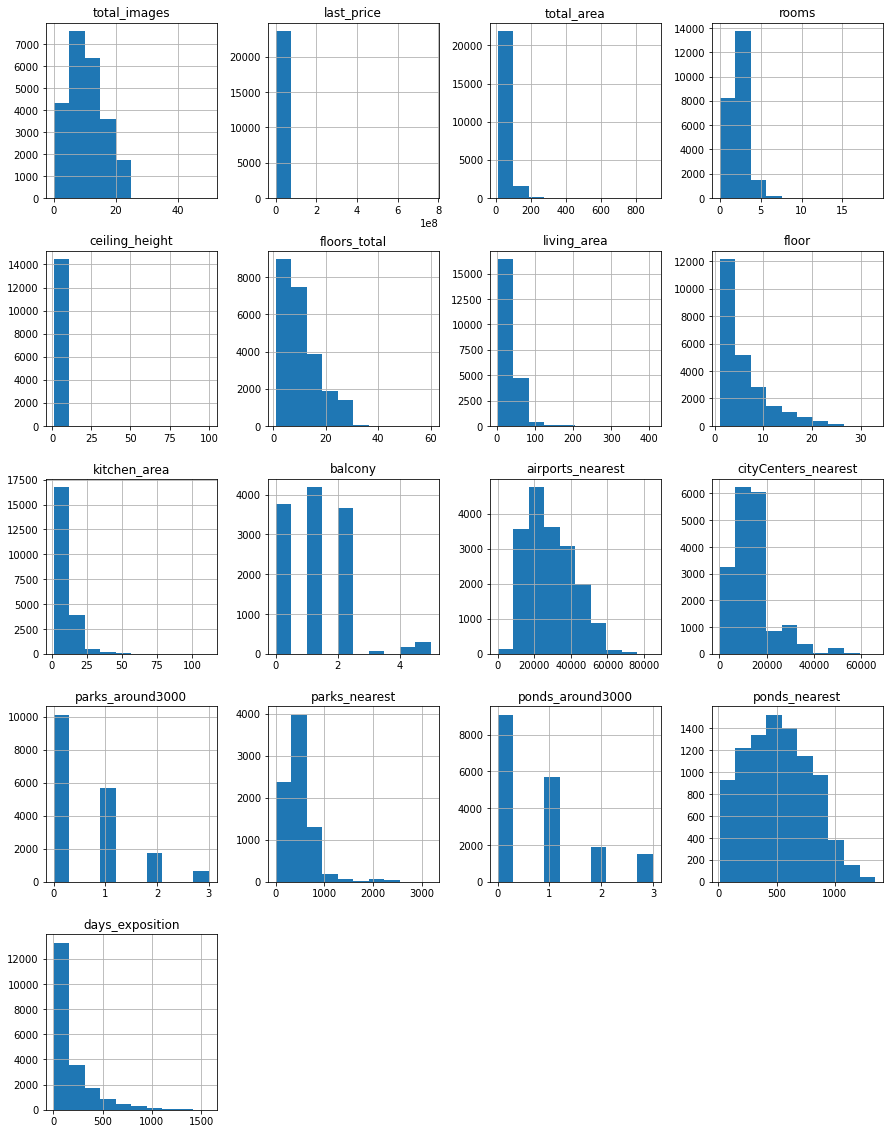

In [3]:
data.hist(figsize=(15, 20))

В файле обнаружены следующие несответствия:
1. Тип first_day_exposition - object. Формат для обработки времени - datetime.
   Значения времени - нули.
2. floors_total - float, должны быть int, т.к. кол-во этажей является целочисленным значением. Есть нулевые значения.
3. is_appartment - object. Должен быть bool, т.к. вероятно тут проверяется, является ли квартира аппартаментами. Есть нулевые значения.
4. kitchen_area - нулевые значения.
5. balcony - нулевые значения, нужно целочисленное значениие.
6. locality_name - нулевые значения.
7. airports_nearest - нулевые значения.
8. cityCenters_nearest - нулевые значения.
9. parks_around3000 - парки целые, нужный тип - int. Есть нулевые значения.
10. parks_nearest - парки целые, нужный тип - int. Есть нулевые значения.
11. ponds_around3000 - пруды целые, нужный тип - int. Есть нулевые значения.
12. ponds_nearest - пруды целые, нужный тип - int. Есть нулевые значения.
13. days_exposition - дни целые, нужный тип - int. Есть нулевые значения.
14. ceiling_height - нулевые значения.
15. living_area - нулевые значения.

### Предобработка данных

In [4]:
data['total_images'].value_counts()
data['total_area'].value_counts()
data['rooms'].value_counts()
data['studio'].value_counts()
data['open_plan'].value_counts()
data['airports_nearest'].value_counts()
data['cityCenters_nearest'].value_counts()
data['parks_around3000'].value_counts()
data['parks_nearest'].value_counts()
data['ponds_around3000'].value_counts()
data['ponds_nearest'].value_counts()

data['ceiling_height'].value_counts()
data['ceiling_height'].describe()
data[data['ceiling_height'] > 5].sort_values('ceiling_height', ascending=False).tail(50)

data[data['floors_total'].isna()]

data['living_area'].value_counts()
data['living_area'].describe()
data['living_area'].isna().sum()

data['floor'].value_counts()
data['kitchen_area'].value_counts()
data['balcony'].value_counts() 

data['locality_name'].value_counts()
data['locality_name'].isna().sum() 

49

In [5]:
data['total_area'] = data['total_area'].astype('int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data['airports_nearest'] = data['airports_nearest'].fillna(0).astype('int')
data['balcony'] = data['balcony'].fillna(0).astype('int')
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')
data['is_apartment'] = data['is_apartment'].fillna(False)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  int64         
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [6]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.strip()
data['locality_name'] = data['locality_name'].str.replace('петергоф', 'санкт-петербург') 
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок') 
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')
data['locality_name'] = data['locality_name'].str.replace('поселок мурино', 'мурино')
data['locality_name'] = data['locality_name'].str.replace('деревня кудрово', 'кудрово')
data['locality_name'] = data['locality_name'].str.replace('поселок коммунар', 'коммунар')
data['locality_name'] = data['locality_name'].str.replace('коммунары', 'коммунар')
data['locality_name'] = data['locality_name'].str.replace('деревня федоровское', 'поселок городского типа федоровское')
data['locality_name'] = data['locality_name'].str.replace('село никольское', 'никольское')
data['locality_name'] = data['locality_name'].str.replace('село павлово', 'поселок городского типа павлово')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество рахья', 'поселок городского типа рахья')
data['locality_name'] = data['locality_name'].str.replace('поселок зимитицы', 'деревня зимитицы')
data['locality_name'] = data['locality_name'].str.replace('поселок рябово', 'поселок городского типа рябово')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции вещево', 'поселок станции вещево')
data['locality_name'] = data['locality_name'].str.replace('деревня калитино', 'поселок калитино')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество приладожский', 'поселок приладожский')
data['locality_name'] = data['locality_name'].str.replace('деревня щеглово', 'поселок щеглово')
data['locality_name'] = data['locality_name'].str.replace('деревня рабитицы', 'поселок рабитицы')
data['locality_name'] = data['locality_name'].str.replace('деревня гарболово', 'поселок гарболово')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции приветнинское', 'поселок станции приветнинское')
data['locality_name'] = data['locality_name'].str.replace('поселок любань', 'поселок любань')
data['locality_name'] = data['locality_name'].str.replace('поселок станции громово', 'поселок громово')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок лесное', 'поселок лесное')
data['locality_name'] = data['locality_name'].str.replace('деревня калитино', 'поселок калитино')
data['locality_name'] = data['locality_name'].str.replace('деревня калитино', 'поселок калитино')
data['locality_name'] = data['locality_name'].str.replace('деревня калитино', 'поселок калитино')

len(data['locality_name'].unique())

307

#### Работа с аномалиями
##### Высота потолков

<AxesSubplot:>

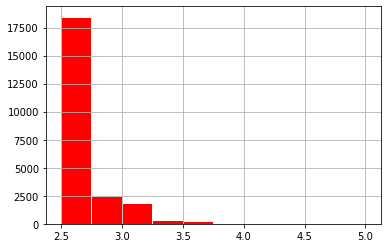

In [7]:
data.describe()

remove_c_height = data[data['ceiling_height'] > 5].index
data = data.drop(remove_c_height).reset_index(drop=True)

remove_c_height = data[data['ceiling_height'] < 2.5].index
data = data.drop(remove_c_height).reset_index(drop=True)

data['ceiling_height'].describe()
data['ceiling_height'].hist(bins=10, facecolor='red', ec='white', ylabelsize=10, xlabelsize=10)
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].hist(bins=10, facecolor='red', ec='white', ylabelsize=10, xlabelsize=10)

##### Цена

430000
20000000


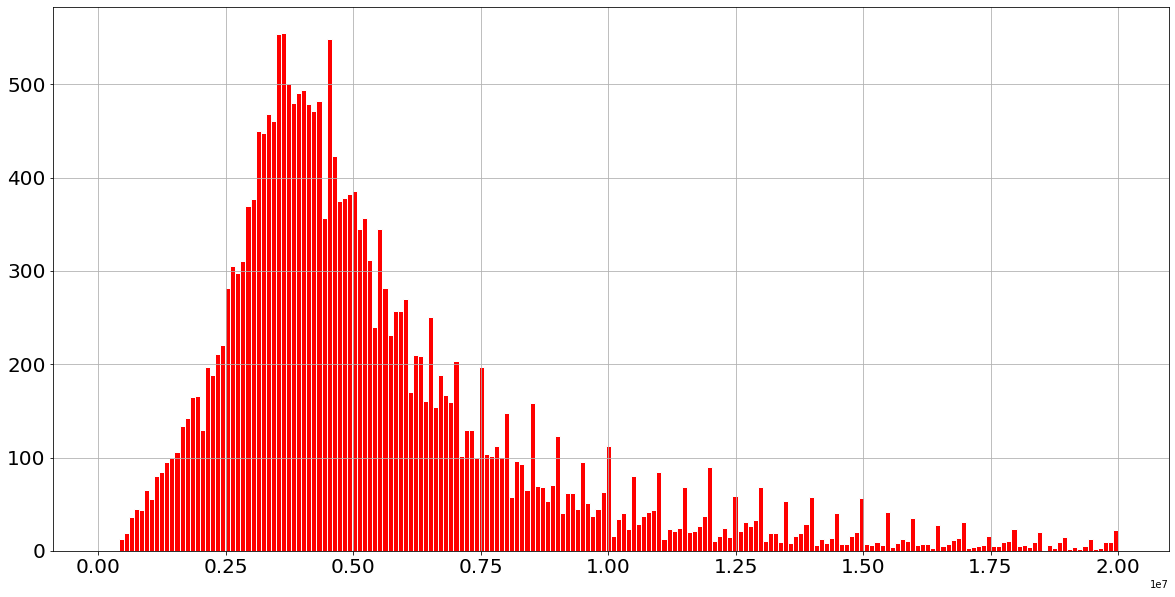

In [8]:
remove_price = data[data['last_price'] > 20000000].index
data = data.drop(remove_price).reset_index(drop=True)

remove_price = data[data['last_price'] < 100000].index
data = data.drop(remove_price).reset_index(drop=True)

data['last_price'].describe()
data['last_price'].hist(bins=200, figsize=(20,10), xlabelsize=20, ylabelsize=20, range=(100000, 20000000), facecolor='red', ec='white')

print(data['last_price'].min())
print(data['last_price'].max())

##### Площадь

<AxesSubplot:>

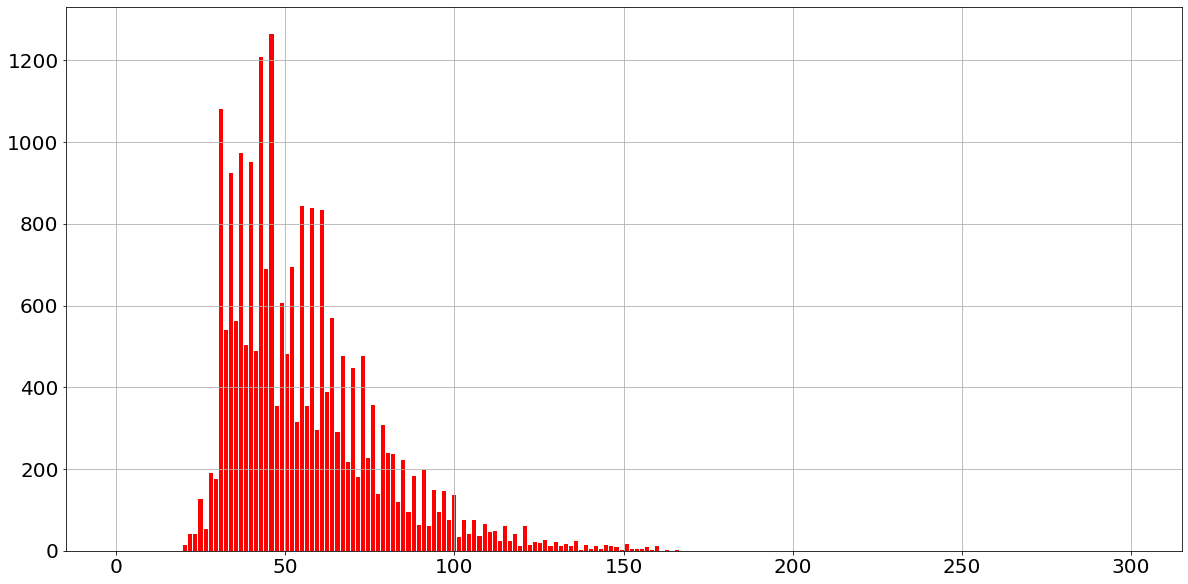

In [9]:
data['total_area'] = data['total_area'].astype('int')
data['total_area'].describe()

remove_area = data[data['total_area'] > 165].index
data = data.drop(remove_area).reset_index(drop=True)

remove_area = data[data['total_area'] < 20].index
data = data.drop(remove_area).reset_index(drop=True)

data['total_area'].hist(bins=200, figsize=(20,10), xlabelsize=20, ylabelsize=20, range=(0, 300), facecolor='red', ec='white')


##### Комнаты

<AxesSubplot:>

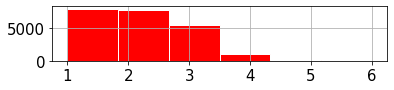

In [10]:
remove_area = data[data['rooms'] > 6].index
data = data.drop(remove_area).reset_index(drop=True)

remove_area = data[data['rooms'] <= 0].index
data = data.drop(remove_area).reset_index(drop=True)

data['rooms'].hist(bins=6, figsize=(6,1), xlabelsize=15, ylabelsize=15, facecolor='red', ec='white')

##### Количество этажей в доме

<AxesSubplot:>

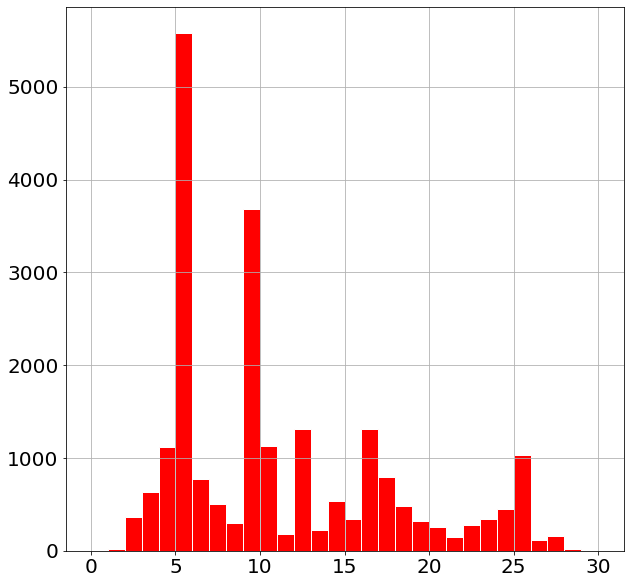

In [11]:
data['floors_total'].describe()

remove_ftotal = data[data['floors_total'] > 30].index
data = data.drop(remove_ftotal).reset_index(drop=True)

remove_ftotal = data[data['floors_total'] <= 0].index
data = data.drop(remove_ftotal).reset_index(drop=True)

data['floors_total'].hist(bins=30, figsize=(10,10), xlabelsize=20, ylabelsize=20, range=(0, 30), facecolor='red', ec='white')

##### Площадь жилая

<AxesSubplot:>

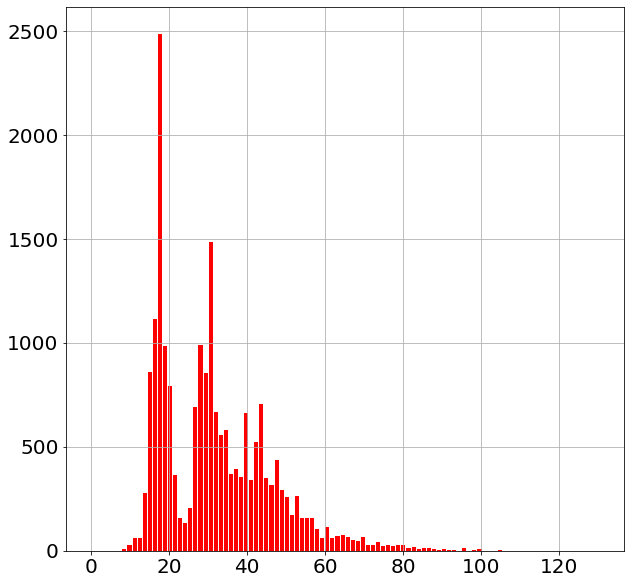

In [12]:
data['living_area'].describe()
data['living_area'].hist(bins=100, figsize=(10,10), xlabelsize=20, ylabelsize=20, range=(0, 130), facecolor='red', ec='white')

##### Этаж, на котором расположена недвижимость

<AxesSubplot:>

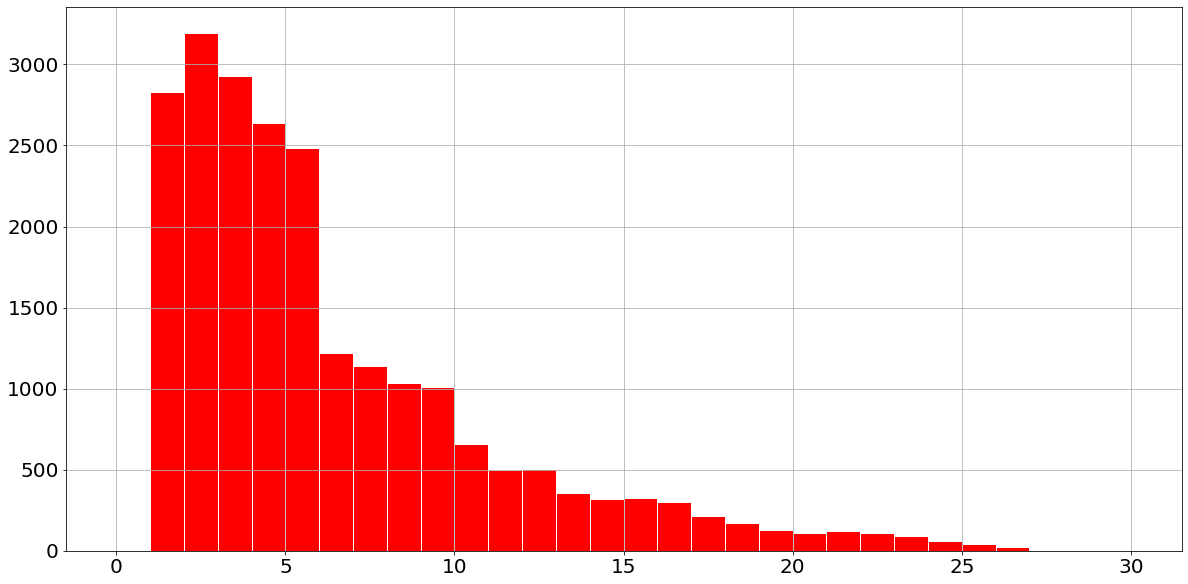

In [13]:
data['floor'].describe()
data['floor'].hist(bins=30, figsize=(20,10), xlabelsize=20, ylabelsize=20, range=(0, 30), facecolor='red', ec='white')

##### Площадь кухни

<AxesSubplot:>

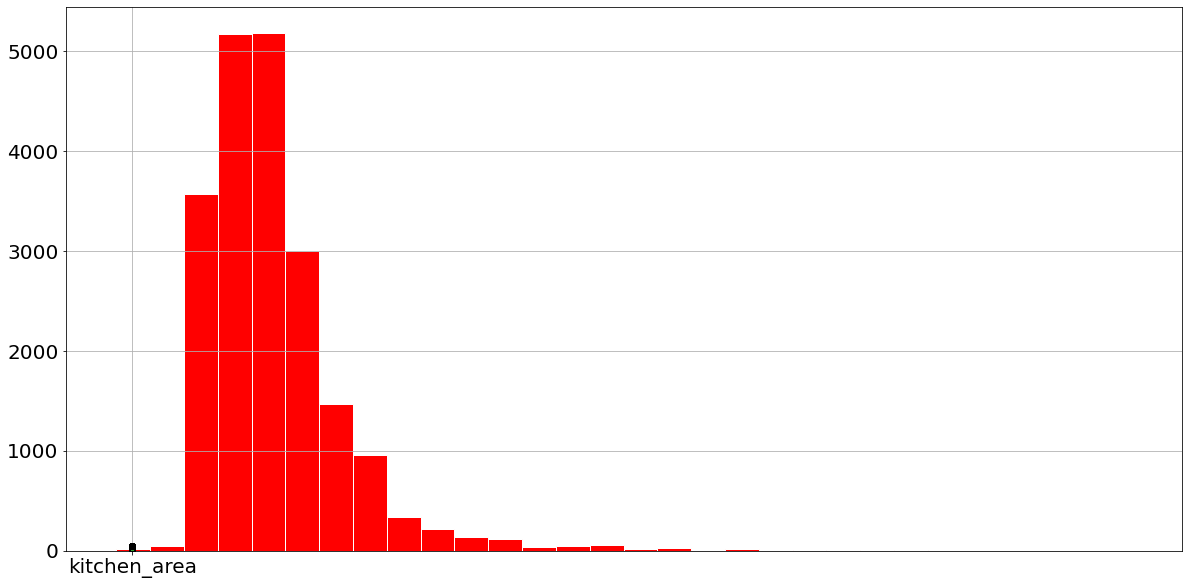

In [14]:
data['kitchen_area'].describe()
data['kitchen_area'].isna().sum()

data.loc[data['studio'] == True, 'kitchen_area'] = 0
data.loc[data['studio'] == True]
         
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

remove_kitchen_area = data[data['kitchen_area'] > 55].index
data = data.drop(remove_kitchen_area).reset_index(drop=True)

data.query('total_area < (living_area + kitchen_area)')
data = data.query('total_area > (living_area + kitchen_area)')

data.boxplot('kitchen_area', figsize=(2,10))
data['kitchen_area'].hist(bins=30, figsize=(20,10), xlabelsize=20, ylabelsize=20, range=(0, 64), facecolor='red', ec='white')

##### Локация

<AxesSubplot:>

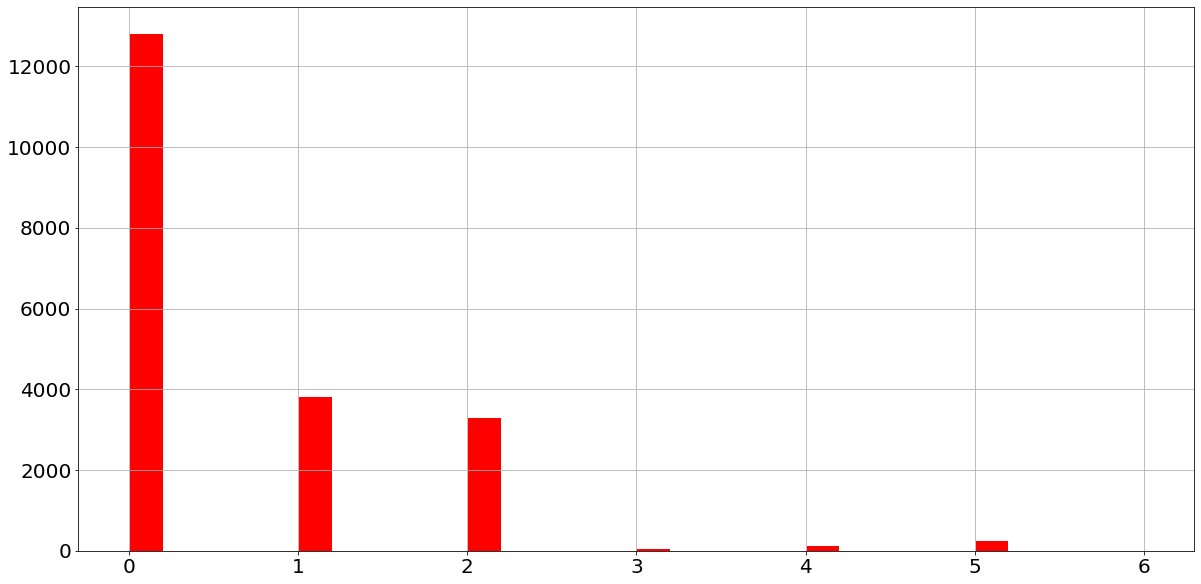

In [15]:
data['locality_name'].isna().sum()
data['locality_name'].describe()

data = data.dropna(subset=['locality_name'])

data['balcony'].hist(bins=30, figsize=(20,10), xlabelsize=20, ylabelsize=20, range=(0, 6), facecolor='red', ec='white')

##### Ближайшие парки и пруды

In [16]:
data['ponds_nearest'].isna().sum()
data['parks_nearest'].isna().sum()

13587

##### Аэропорты

In [17]:
data['airports_nearest'].isna().sum()
data['airports_nearest'].median()

21793.0

##### Центры

In [18]:
data['cityCenters_nearest'].isna().sum()
data['cityCenters_nearest'].median()

13285.5

##### Парки и пруды в пределах трех километров

In [19]:
data['parks_around3000'].describe()
data['parks_around3000'].mean()

data['ponds_around3000'].describe()
data['ponds_around3000'].mean()

0.5649642892084923

##### Процент некорректных данных

In [20]:
data.shape[0] / old_data.shape[0]

0.8625680408456053

Вывод: Количество некорректных данных в таблице составило ~14%.

### Добавление новых данных

#### Цена квадратного метра

In [21]:
data['price_sq_m'] = round(data['last_price'] / data['total_area'], 2)

#### День недели публикации объявления

In [22]:
data['weekday'] = data['first_day_exposition'].dt.weekday

#### Месяц публикации объявления

In [23]:
data['month'] = data['first_day_exposition'].dt.month

#### Год публикации объявления

In [24]:
data['year'] = data['first_day_exposition'].dt.year

#### Тип этажа квартиры

In [25]:
def floor_t(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_t, axis=1)

#### Расстояние до центра города в километрах

In [26]:
data['citycenter_km'] = (data['cityCenters_nearest'] / 1000).round()

### Исследовательский анализ данных

#### Общая площадь

count    20442.000000
mean        56.172439
std         22.213840
min         20.000000
25%         40.000000
50%         51.000000
75%         67.000000
max        165.000000
Name: total_area, dtype: float64

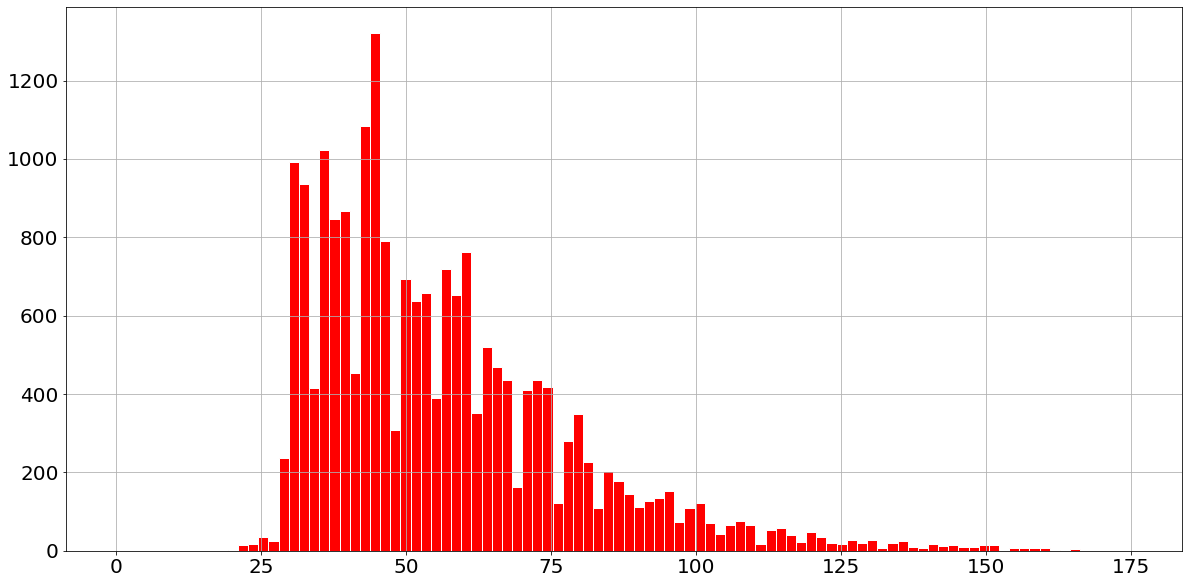

In [27]:
data['total_area'].hist(bins=100, figsize=(20,10), xlabelsize=20, ylabelsize=20, range=(0, 175), facecolor='red', ec='white')
data['total_area'].describe()

Вывод: На площадке продаются квартиры, площадью, в основном, до 67 метров.

#### Жилая площадь

count    20442.000000
mean        32.215294
std         15.289723
min          2.000000
25%         18.500000
50%         30.000000
75%         41.200000
max        140.000000
Name: living_area, dtype: float64

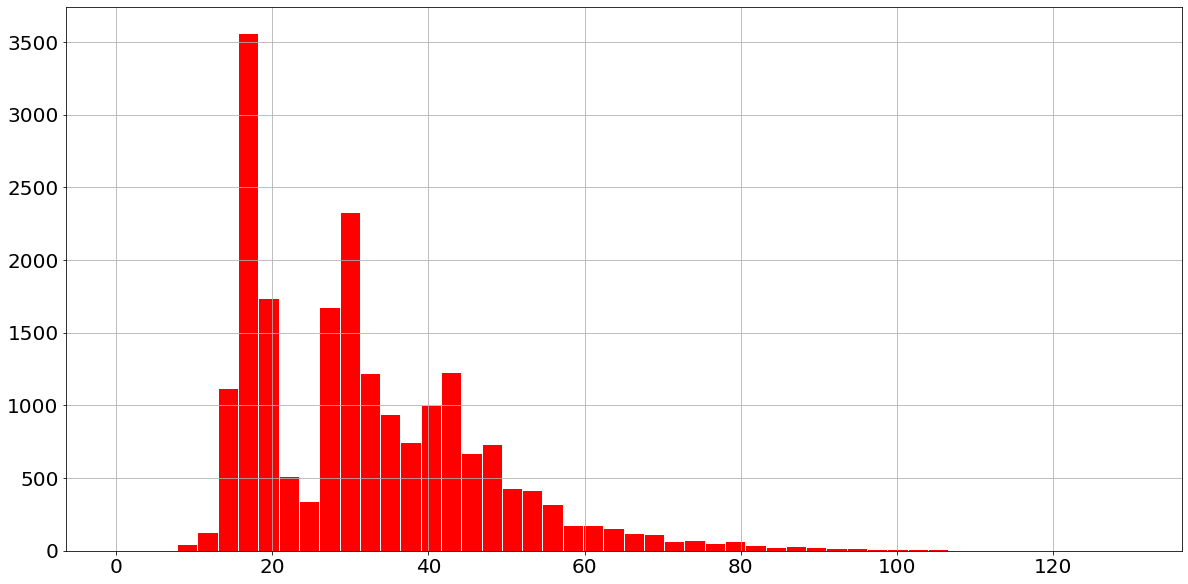

In [28]:
data['living_area'].hist(bins=50, figsize=(20,10), xlabelsize=20, ylabelsize=20, range=(0, 130), facecolor='red', ec='white')
data['living_area'].describe()

Вывод: Основная часть квартир обладает площадью до 41 квадратных метра.

#### Площадь кухни

count    20442.000000
mean         9.953305
std          4.394254
min          0.000000
25%          7.000000
50%          9.000000
75%         11.300000
max         51.000000
Name: kitchen_area, dtype: float64

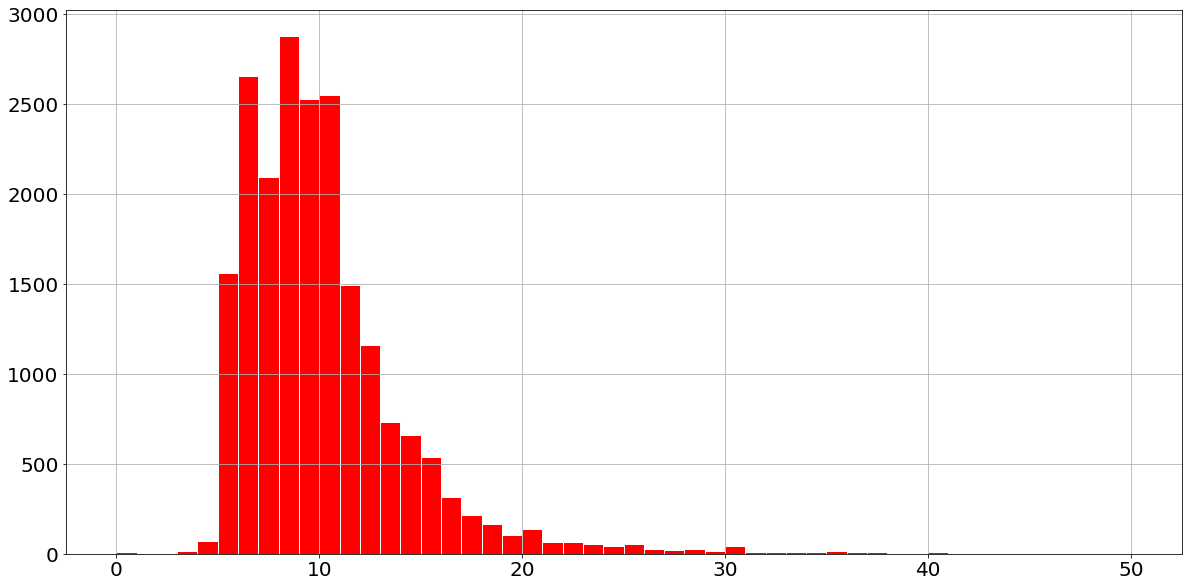

In [29]:
data['kitchen_area'].hist(bins=50, figsize=(20,10), xlabelsize=20, ylabelsize=20, range=(0, 50), facecolor='red', ec='white')
data['kitchen_area'].describe()

Вывод: Основная часть кухонь на площадке обладает площадью до 11 квадратных метров.

#### Цена объекта

count    20442.000000
mean         5.418525
std          3.104294
min          0.430000
25%          3.450000
50%          4.600000
75%          6.500000
max         20.000000
Name: last_price_mln, dtype: float64

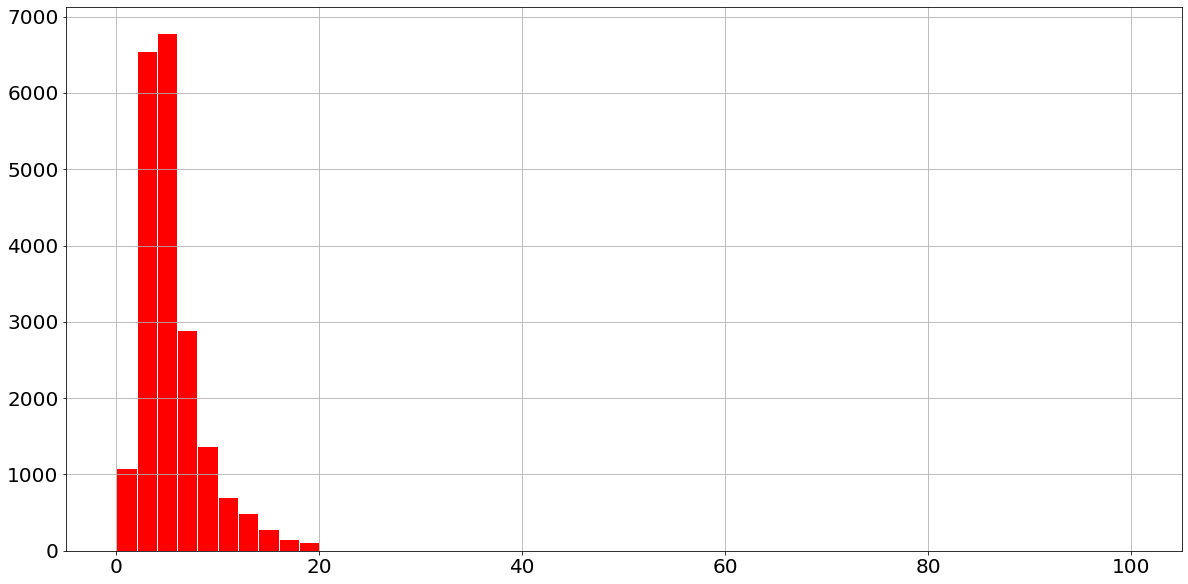

In [30]:
data['last_price_mln'] = data['last_price']/1000000 #цена в миллионах
data['last_price_mln'].hist(bins=50, figsize=(20,10), xlabelsize=20, ylabelsize=20, range=(0, 100), facecolor='red', ec='white')
data['last_price_mln'].describe()

Вывод: Преимущественно, на площадке выставлены квартиры ценой до ~6 миллионов.

#### Количество комнат

<AxesSubplot:>

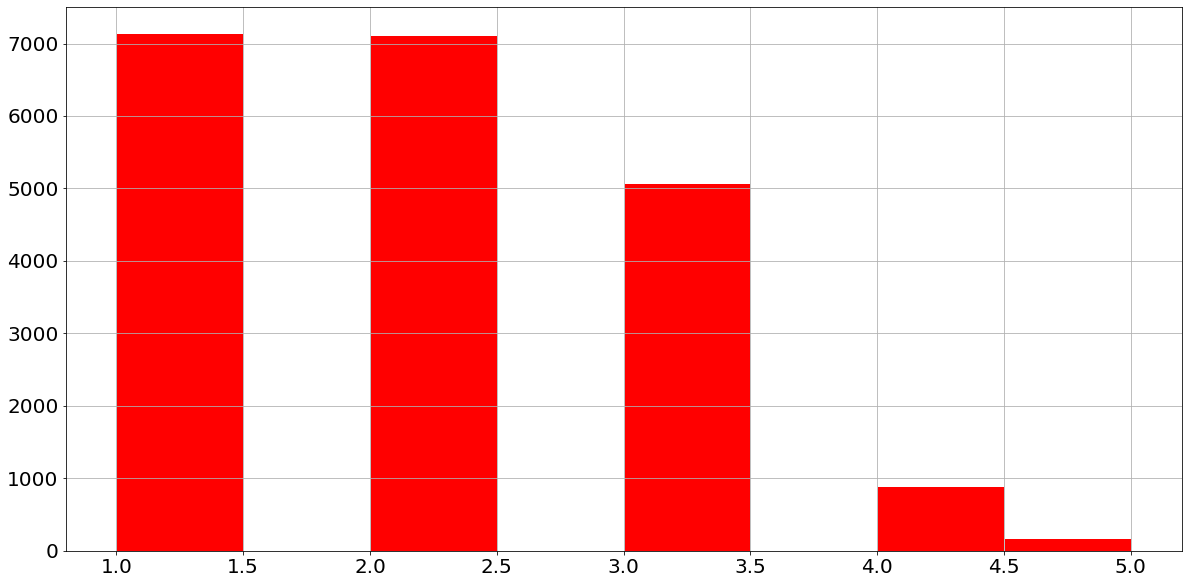

In [31]:
data['rooms'].hist(bins=8, figsize=(20,10), xlabelsize=20, ylabelsize=20, range=(1, 5), facecolor='red', ec='white')

Вывод:
- Одно- и двух-комнатные квартиры встречаются в продаже чаще всего.
- Немного реже - трех-комнатные.
- Четырехкомнатных квартир в выборке обнаружено ~1000.
- Пятикомнатные квартиры в продаже - редкость.

#### Высота потолков

count    20442.000000
mean         2.686493
std          0.199423
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.800000
Name: ceiling_height, dtype: float64

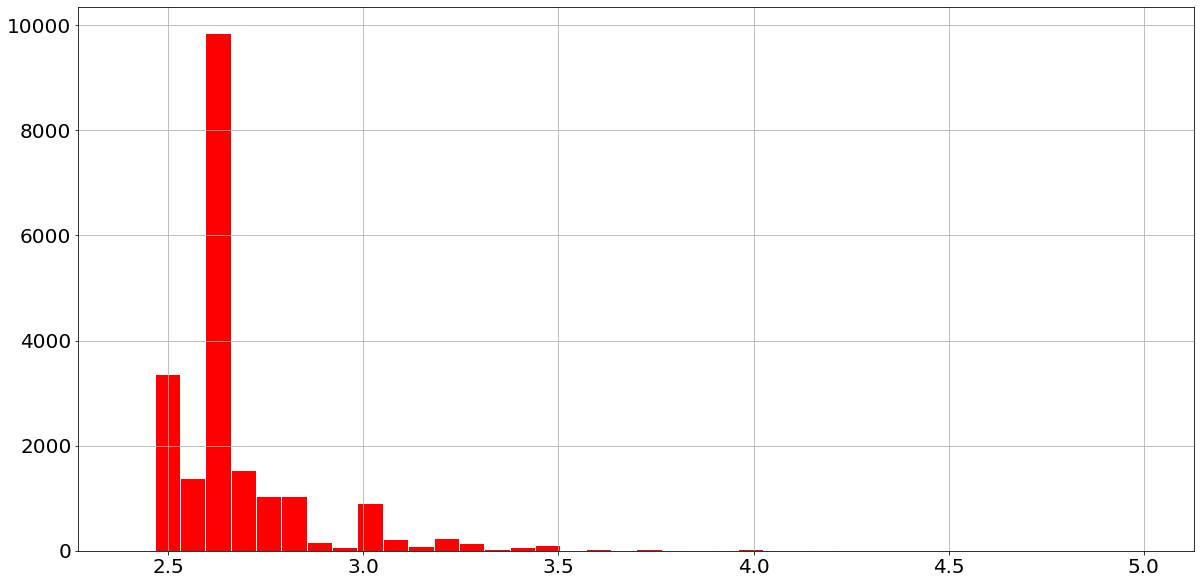

In [32]:
data['ceiling_height'].hist(bins=40, figsize=(20,10), xlabelsize=20, ylabelsize=20, range=(2.4, 5), facecolor='red', ec='white')
data['ceiling_height'].describe()

Вывод: ~2,7м - самая частая высота потолков в продаваемых квартирах.

#### Этаж квартиры

count    20442.000000
mean         5.841992
std          4.814009
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

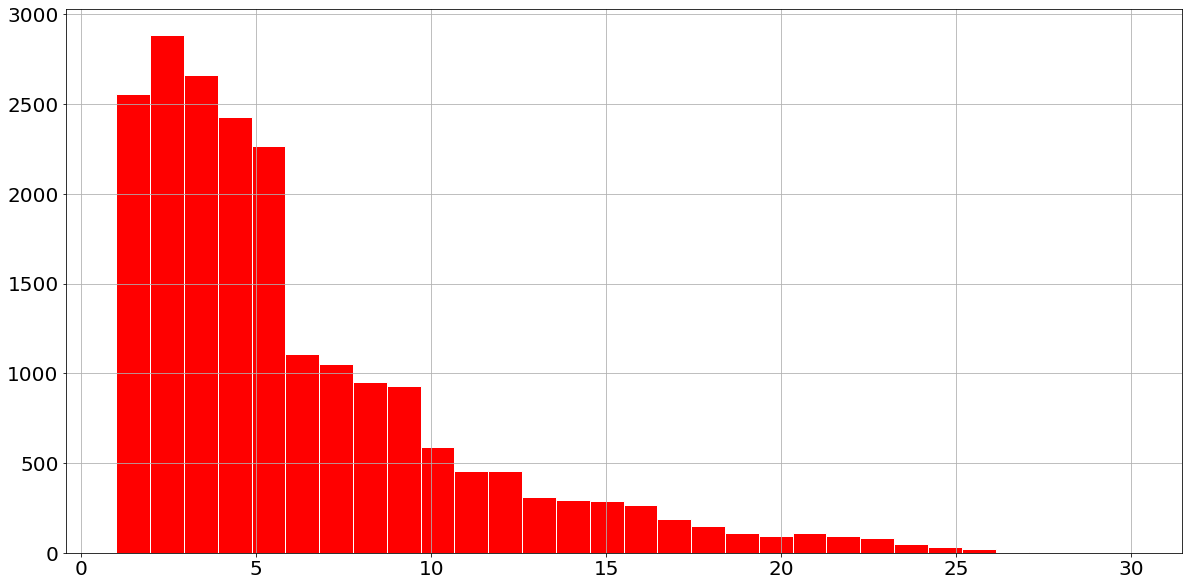

In [33]:
data['floor'].hist(bins=30, figsize=(20,10), xlabelsize=20, ylabelsize=20, range=(1, 30), facecolor='red', ec='white')
data['floor'].describe()

Вывод: Основная часть продаваемых квартир располагается на 1-8 этажах.

#### Тип этажа квартиры

count      20442
unique         3
top       другой
freq       15037
Name: floor_type, dtype: object

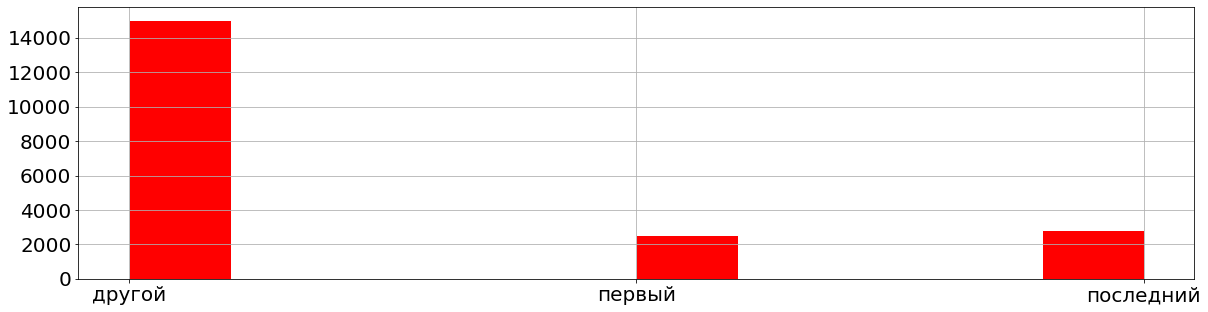

In [34]:
data['floor_type'].hist(figsize=(20,5), xlabelsize=20, ylabelsize=20, facecolor='red', ec='white')
data['floor_type'].describe()

Вывод: Почти 75% продаваемых квартир расположены не на первом или последнем этажах.

#### Общее количество этажей в доме

<AxesSubplot:>

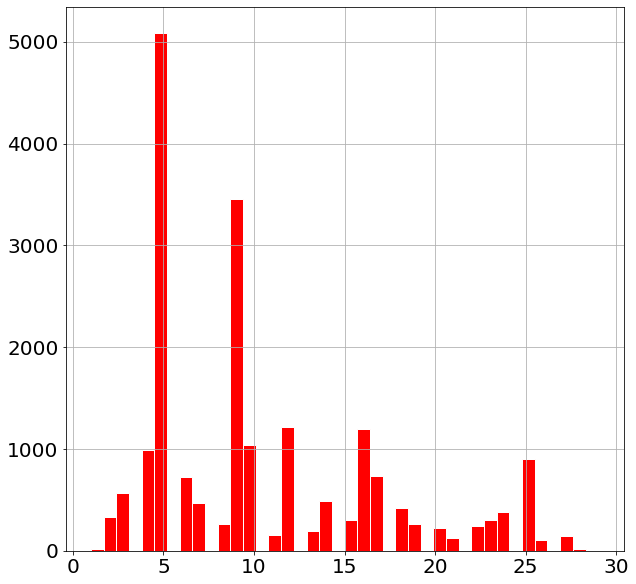

In [35]:
data['floors_total'].hist(bins=40, figsize=(10,10), xlabelsize=20, ylabelsize=20, facecolor='red', ec='white')

Основная часть продаваемых квартир расположена в 5-ти или 9-ти этажных домах.

#### Расстояние до центра города в метрах

count    15786.000000
mean        14.564741
std          8.649462
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: citycenter_km, dtype: float64

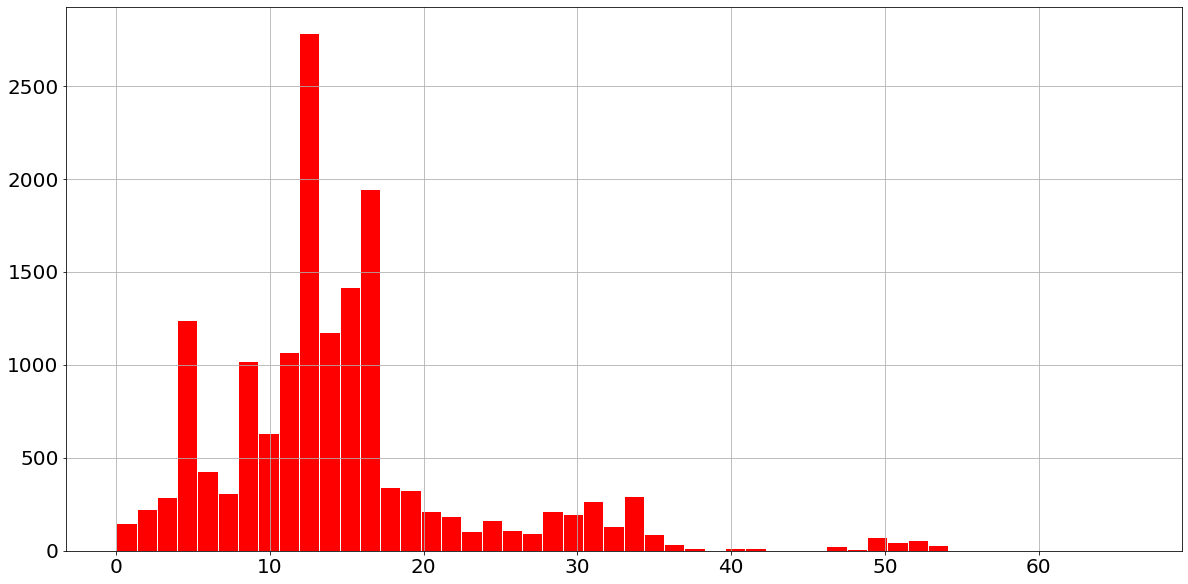

In [36]:
data['citycenter_km'].hist(bins=50, figsize=(20,10), xlabelsize=20, ylabelsize=20, facecolor='red', ec='white')
data['citycenter_km'].describe()

Вывод: Основная часть продаваемых квартир находится в пределах 16 км от центра города

#### Расстояние до ближайшего аэропорта

count    20442.000000
mean     22299.342677
std      16559.615977
min          0.000000
25%      10596.000000
50%      21793.000000
75%      34967.000000
max      84869.000000
Name: airports_nearest, dtype: float64

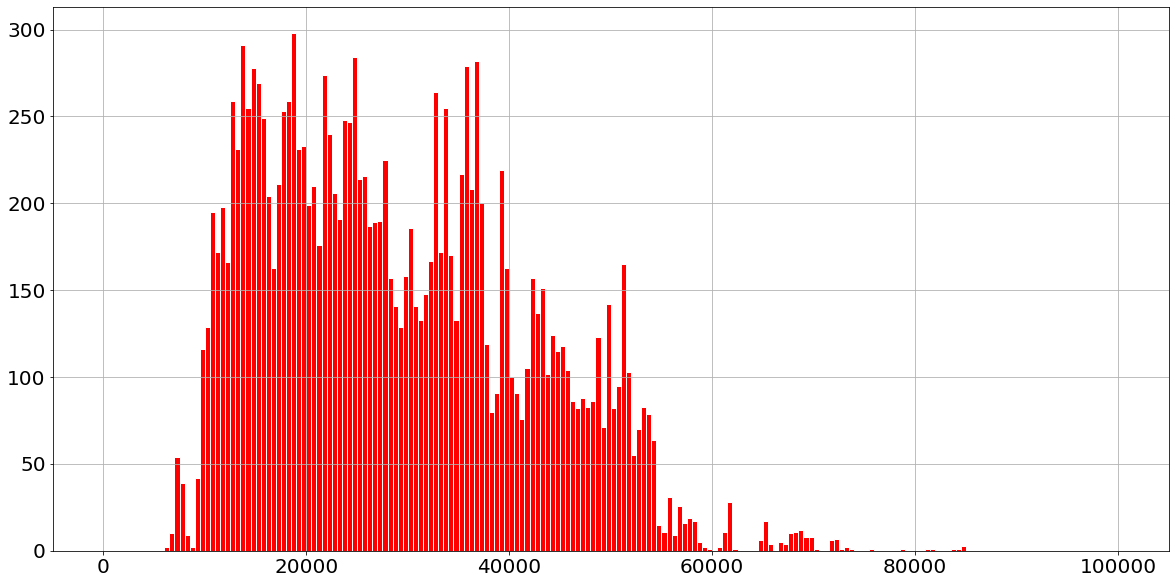

In [37]:
data['airports_nearest'].hist(bins=200, figsize=(20,10), xlabelsize=20, ylabelsize=20, range=(1, 100000), facecolor='red', ec='white')
data['airports_nearest'].describe()

Вывод: Основная часть продаваемых квартир находится в пределах 35 км от аэропорта.

#### Расстояние до ближайшего парка

count    6855.000000
mean      490.134063
std       336.512689
min         1.000000
25%       289.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

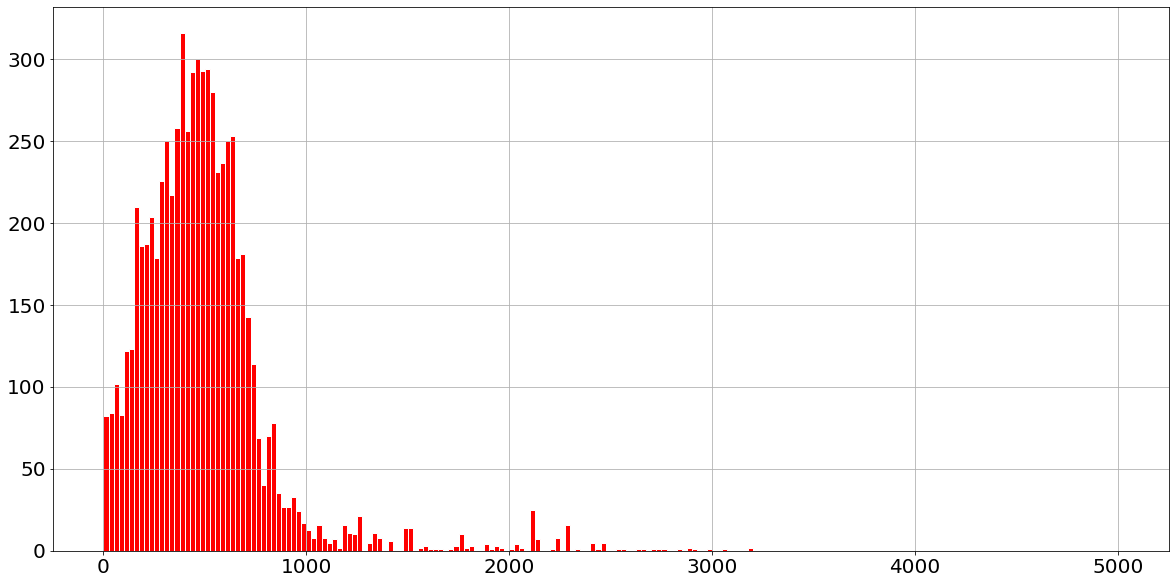

In [38]:
data['parks_nearest'].hist(bins=200, figsize=(20,10), xlabelsize=20, ylabelsize=20, range=(0,5000), facecolor='red', ec='white')
data['parks_nearest'].describe()

Вывод: У большинства продаваемых квартир, в пределах 600м находится, по крайней мере, один парк.

#### День публикации объявления

<AxesSubplot:>

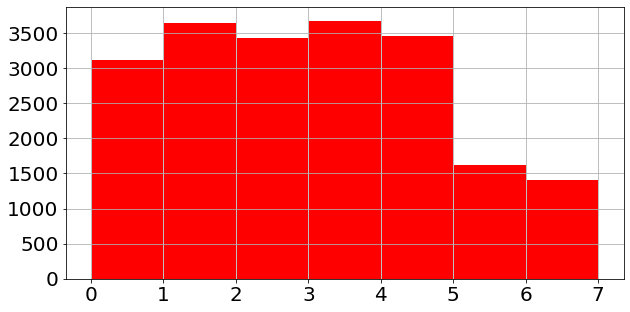

In [39]:
data['weekday'].hist(bins=7, figsize=(10,5), xlabelsize=20, ylabelsize=20, range=(0,7), facecolor='red', ec='white')

Вывод: В выходные на площадке появляется наименьшее количество объявлений за неделю.

#### Месяц публикации объявления

<AxesSubplot:>

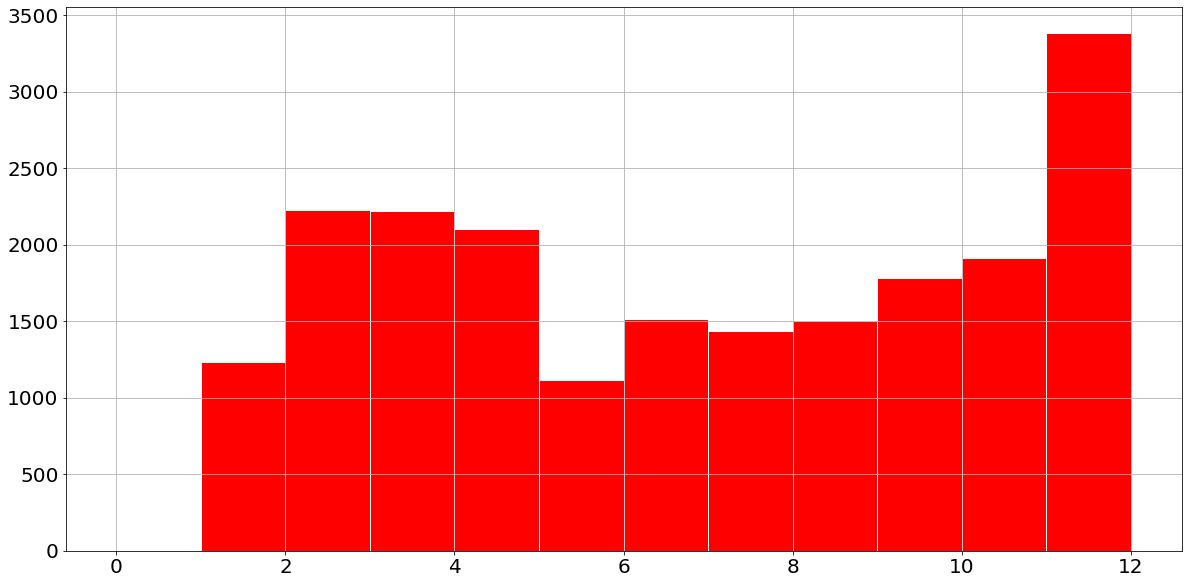

In [40]:
data['month'].hist(bins=12, figsize=(20,10), xlabelsize=20, ylabelsize=20, range=(0,12), facecolor='red', ec='white')

Вывод: В декабре больше всего квартир выставляется на продажу

#### Длительность размещения

In [41]:
data['days_exposition'].describe()

count    17713.000000
mean       182.749901
std        218.719951
min          1.000000
25%         44.000000
50%        100.000000
75%        235.000000
max       1580.000000
Name: days_exposition, dtype: float64

Вывод: 
- В среднем, на продажу квартиры уходит 100 дней. Быстрой можно считать продажу за 44 дня. Если квартира не продается 235 и более дней - возможно, следует, поработать над привлекательностью объявления/квартиры/цены.
- Если объявление закрылось в день открытия - возможно, это ошибка или махинация.
- Если провисело несколько лет - вероятно, причина в том, что квартира уже продана, а про объявление просто забыли.

#### Зависимость цены от общей площади

0.7691794931687586

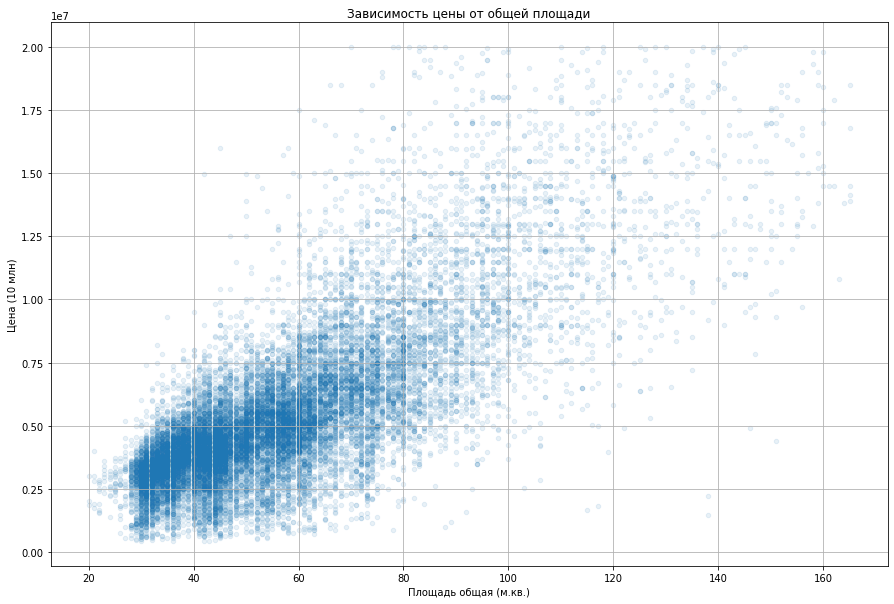

In [42]:
data.plot(x='total_area', y='last_price', xlabel='Площадь общая (м.кв.)', ylabel='Цена (10 млн)', kind='scatter', figsize=(15,10), grid=True, alpha=0.1 ,title='Зависимость цены от общей площади')
data['last_price'].corr(data['total_area'])

Вывод: Заметна высокая корелляция цены от площади, взаимосвязь цены и общей площади квартиры - прямая.

#### Зависимость цены от жилой площади

0.6468280633282782

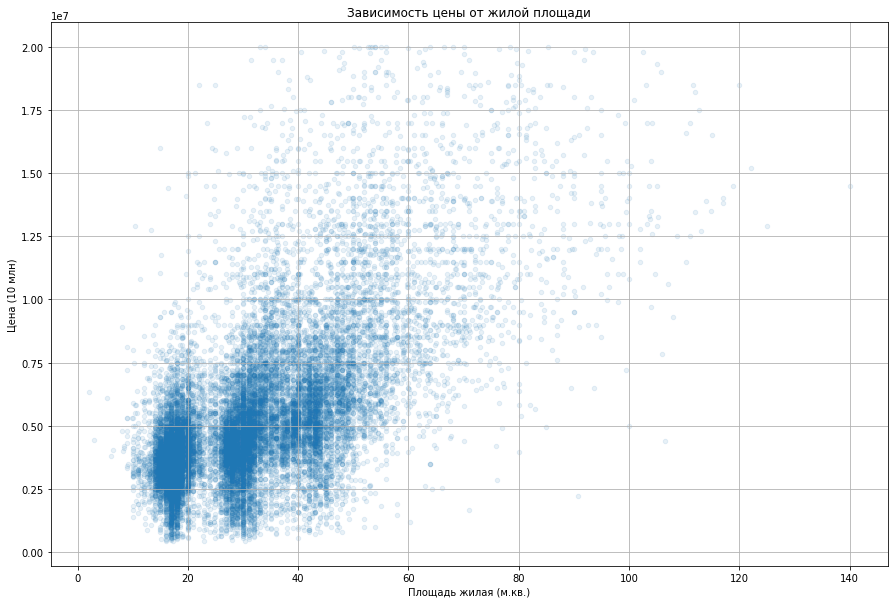

In [43]:
data.plot(x='living_area', y='last_price', xlabel='Площадь жилая (м.кв.)', ylabel='Цена (10 млн)', kind='scatter', figsize=(15,10), grid=True, alpha=0.1 ,title='Зависимость цены от жилой площади')
data['last_price'].corr(data['living_area'])

Вывод: Корелляция средняя. Чем больше жилая площадь, тем выше цена.

#### Зависимость цены от площади кухни

0.5654532078145896

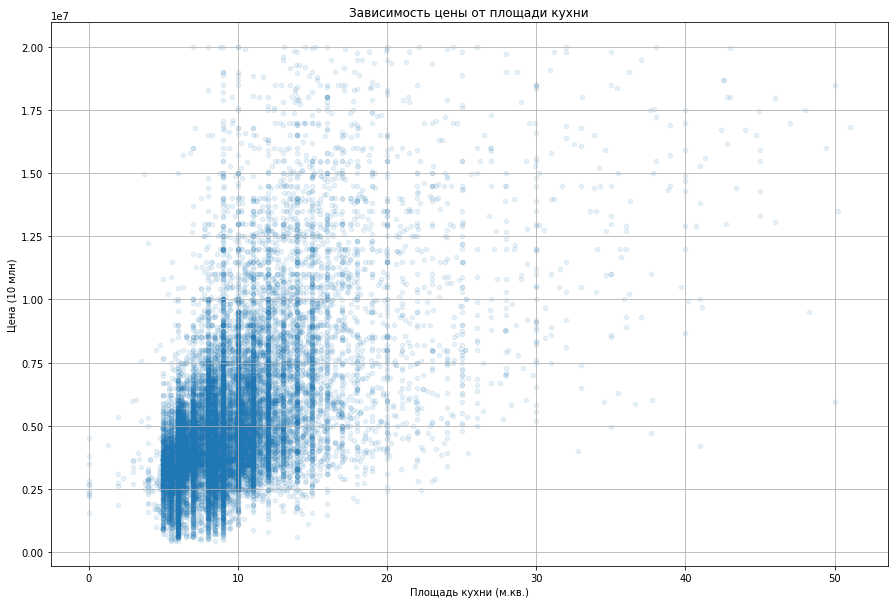

In [44]:
data.plot(x='kitchen_area', y='last_price', xlabel='Площадь кухни (м.кв.)', ylabel='Цена (10 млн)', kind='scatter', figsize=(15,10), grid=True, alpha=0.1 ,title='Зависимость цены от площади кухни')
data['last_price'].corr(data['kitchen_area'])

Вывод: Корелляция средняя. Чем больше площадь кухни, тем выше цена.

#### Зависимость цены от количества комнат

0.48899388095707336

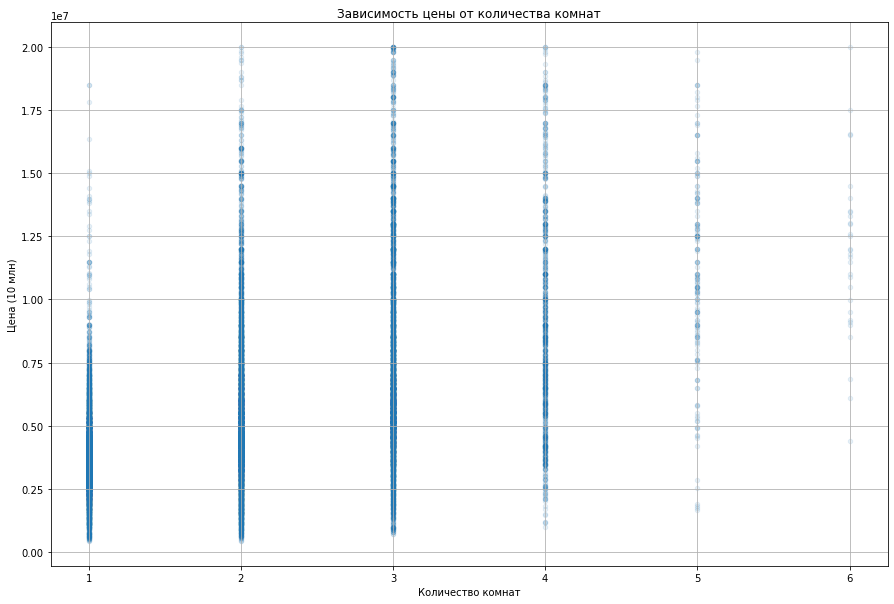

In [45]:
data.plot(x='rooms', y='last_price', xlabel='Количество комнат', ylabel='Цена (10 млн)', kind='scatter', figsize=(15,10), grid=True, alpha=0.1 ,title='Зависимость цены от количества комнат')
data['last_price'].corr(data['rooms'])

Вывод: Корелляция слабая. Цена квартиры не зависит от количества комнат.

#### Зависимость цены от этажа

0.10308152073663511

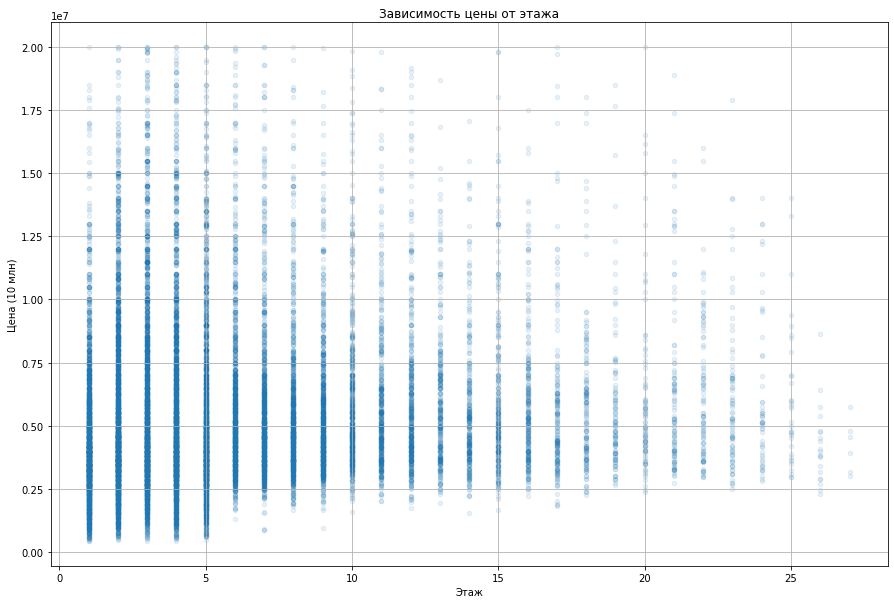

In [46]:
data.plot(x='floor', y='last_price', xlabel='Этаж', ylabel='Цена (10 млн)', kind='scatter', figsize=(15,10), grid=True, alpha=0.1 ,title='Зависимость цены от этажа')
data['last_price'].corr(data['floor'])

Вывод: Корелляция очень слабая. Цена квартиры не зависит от этажа.

#### Зависимость цены от категории этажа

0.10308152073663511

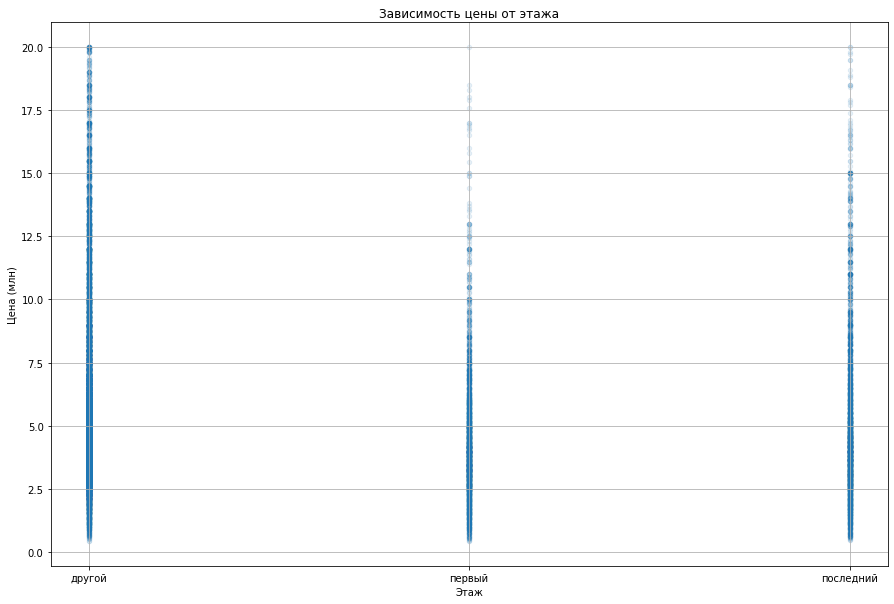

In [ ]:
data.plot(x='floor_type', y='last_price_mln', xlabel='Этаж', ylabel='Цена (млн)', kind='scatter', figsize=(15,10), grid=True, alpha=0.1 ,title='Зависимость цены от этажа')
data['last_price'].corr(data['floor'])

Вывод: Корелляция очень слабая. Можно сказать, что цена независит от этажа.

#### Зависимость цены от даты размещения

##### День

-0.013573201089517825

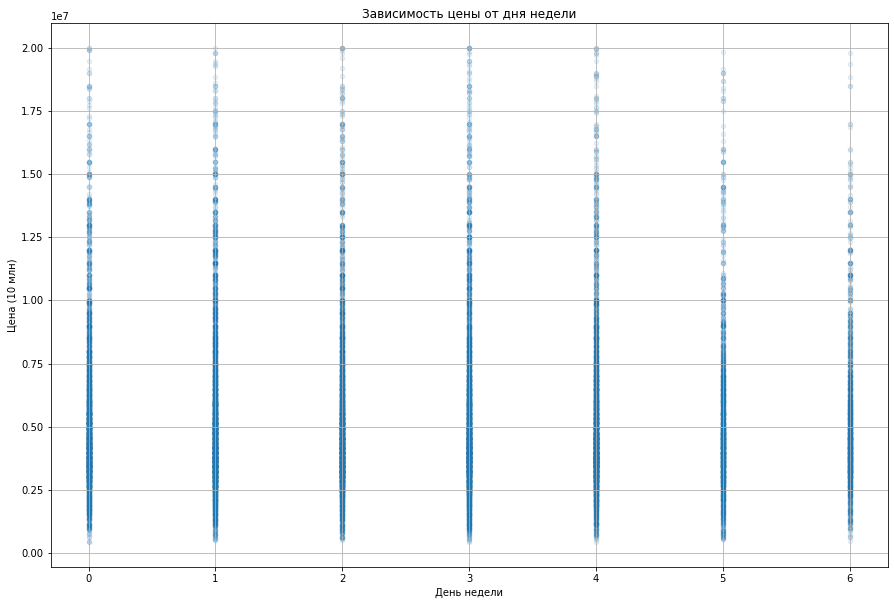

In [48]:
data.plot(x='weekday', y='last_price', xlabel='День недели', ylabel='Цена (10 млн)', kind='scatter', figsize=(15,10), grid=True, alpha=0.1 ,title='Зависимость цены от дня недели')
data['last_price'].corr(data['weekday'])

Вывод: Корелляция очень слабая, отрицательная. Цена на квартиру от дня недели не зависит.

##### Месяц

0.0035476513712148065

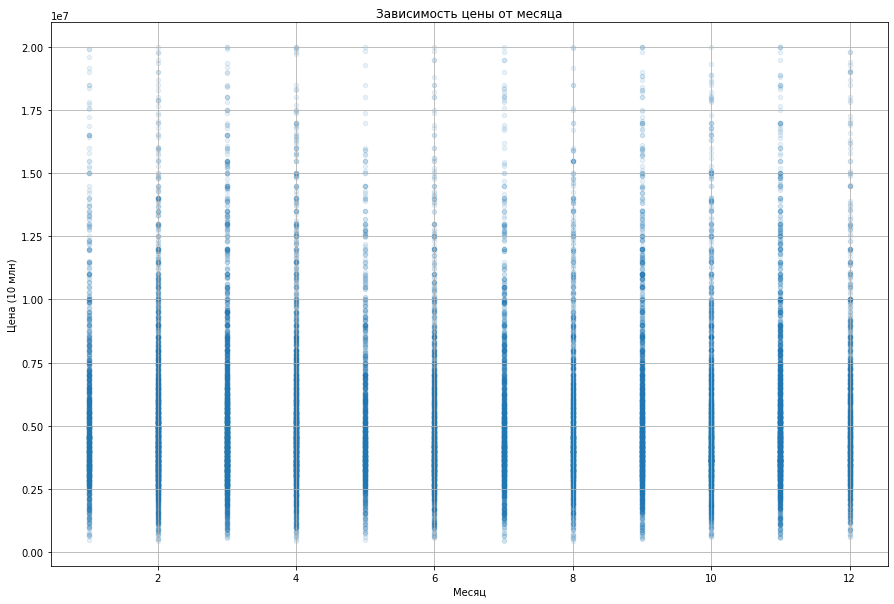

In [49]:
data.plot(x='month', y='last_price', xlabel='Месяц', ylabel='Цена (10 млн)', kind='scatter', figsize=(15,10), grid=True, alpha=0.1 ,title='Зависимость цены от месяца')
data['last_price'].corr(data['month'])

Вывод: Корелляция очень слабая. Цена на квартиру от месяца не зависит.

##### Год

<AxesSubplot:xlabel='year', ylabel='last_price_mln'>

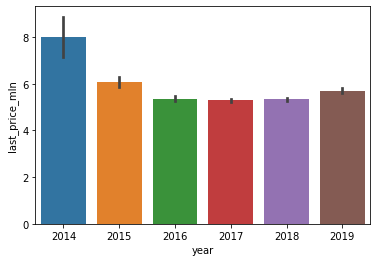

In [50]:
sns.barplot(x=data['year'], y=data['last_price_mln'])

Выводы по разделу: 
- Цена на квартиру находится в средней зависимости от жилой площади и площади кухни и количества комнат.
- Слабее цена зависит от этажа расположения.
- Зависимости от даты, года или дня недели, которую стоило бы принять во внимание в рамках исследования - нет.

- Наблюдается прямая зависимость между общей площадью квартиры и ценой. Следовательно, покупатель больше обращает внимание прежде всего на общую площадь квартиры, нежели на цифры, описывающие площади отдельных помещений/ различого назначения.

Дополнительный вывод: С 2014 по 2016 год был тренд на значительное снижение цен на квартиры. 
С 2016 по 2019 цены находятся примерно в одном диапазоне
Как следствие, цена на квартиру от года зависит крайне слабо.

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [51]:
locality_sq = data.pivot_table(index = 'locality_name', values = 'price_sq_m', aggfunc=['count', 'mean'])
locality_sq.columns = ['Всего объявлений', 'Средняя цена за кв.м.']
locality_sq = locality_sq.sort_values('Всего объявлений', ascending = False).head(10)
locality_sq

,Всего объявлений,Средняя цена за кв.м.
locality_name,,
санкт-петербург,13744,108430.614715
мурино,467,86229.761670
поселок шушары,397,78786.045113
кудрово,381,95844.527349
всеволожск,356,67633.405253
пушкин,329,102914.981581
колпино,324,75534.397469
поселок парголово,294,90998.082721
гатчина,287,68822.494460


Вывод: 
- Самая высокая стоимость квадратного метра - в Санкт-Петербурге - 108т.
- Самая низкая - в Выборге - 58т.

#### Зависимость цены от расстояния до центра Санкт-Петербурга

<AxesSubplot:xlabel='citycenter_km'>

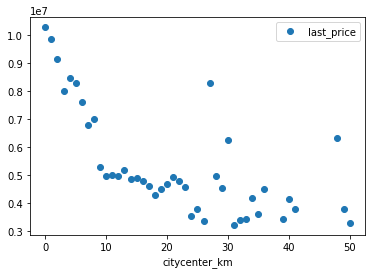

In [52]:
spb = data[data['locality_name'] == 'санкт-петербург']

spb.pivot_table(index='citycenter_km', values='last_price', aggfunc='median').plot(style='o')

Вывод: 
- Заметно резкое снижение цены, в рамках 0-10 км от центра города.
- Стоимость квартир, расположенных дальше 10, но ближе 25км - находится в районе 5 млн.
- Дальше - стоимость постепенно снижается.

### Общий вывод

#### В файле обнаружены несоответствия типов данных и значительное количество пропусков в данных.
В части предлобработки данных было сделано следующее:
1. Данные в таблице приведены к актуальным форматам.

2. Удалены аномалии и выбросы данных в следующих столбцах:
- Высота потолков
- Цена
- Площадь
- Комнаты
- Количество этажей в доме
- Площадь кухни
- Локация

Для поиска аномалий, преимущественно, использовались гистограммы, и диаграммы типа "Ящик с усами".

Количество некорректных данных в таблице составило ~14%.

Для составления более детального вывода, в таблицу добавлены столбцы, указывающие цену квадратного метра, день, месяц и год публикации объявления, тип этажа квартиры и расстояние до центра города в километрах.

#### В ходе исследования, были сделаны следующие выводы:
Подавляющая часть квартир в объявлениях имеет общую площадь до 67, жилую - до 41 и площадь кухни - до 11 квадратных метров. <p>
Преимущественно, на площадке представлены квартиры ценой до ~6 миллионов. <p>
Наибольшую часть рынка занимают 1-,2- и 3-комнатные квартиры. <p>
Высота потолков зачастую равняется 2,7 метрам. <p>
Основная часть продаваемых квартир располагаются на 1-8 этажах. <p>
При этом, 75% квартир расположены не на первом или последнем этажах. <p>
Почти половина продаваемых квартир расположена в пяти- или девяти-этажных домах. <p>
___
Основная часть продаваемых квартир находится в пределах 16 км от центра города и в пределах 35 км от аэропорта. <p>
У большинства продаваемых квартир, в пределах 600м находится, по крайней мере, один парк. <p>
___
В выходные дни на площадке появляется наименьшее количество объявлений за неделю. <p>
Больше всего квартир выставляется на продажу в декабре, меньше всего - в мае. <p>
___
В среднем, на продажу квартиры уходит 100 дней. Быстрой можно считать продажу за 44 дня. Если квартира не продается 235 и более дней - возможно, следует, поработать над привлекательностью объявления/квартиры/цены.
- Если объявление закрылось в день открытия - возможно, это ошибка или махинация.
- Если провисело несколько лет - вероятно, причина в том, что квартира уже продана, а про объявление просто забыли.
___
Цена на квартиру находится в средней зависимости от жилой площади и площади кухни и количества комнат. <p>
Слабее цена зависит от этажа расположения. <p>
Зависимости от даты, года или дня недели, которую стоило бы принять во внимание в рамках исследования - нет. <p>
Наблюдается прямая зависимость между общей площадью квартиры и ценой. Следовательно, покупатель больше обращает внимание, прежде всего, на общую площадь квартиры, нежели на цифры, описывающие площади отдельных помещений/ различного назначения. <p>
___
С 2014 по 2016 год был завиксирован тренд на значительное снижение цен на квартиры. С 2016 по 2019 цены находятся примерно в одном диапазоне Как следствие, цена на квартиру от года зависит крайне слабо.
___
Самая высокая стоимость квадратного метра - в Санкт-Петербурге - 108т.
Самая низкая - в Выборге - 58т.
Заметно резкое снижение цены, в рамках 0-10 км от центра Санкт-Петербурга.
Стоимость квартир, расположенных дальше 10, но ближе 25км - находится в районе 5 млн.
Дальше - стоимость постепенно снижается.
___
#### Вывод:
Основные факторы, прямо влияющие на цену квартиры - общая площадь и удаленность от центра Санкт-Петербурга.
Большая площадь квартиры и расположение ее в центре города - обеспечат квартире высокую стоимость.